# Importing and Querying Data with PostgreSQL (Northwind Database)

Describtion of the Northwind Database: https://en.wikiversity.org/wiki/Database_Examples/Northwind 

Example SQL-Queries based on the Northwind Database: https://www.w3schools.com/sql/default.asp

SQL Tutorials: https://www.youtube.com/watch?v=zpnHsWOy0RY&list=PLP9IO4UYNF0UQkBXlTMSw0CYsxv-GDkkI

## Frequently used SQL clauses (for in-depth learning)

<div>
  <style>
    .sql-keyword {
      color: white;
    }
  </style>
  <span class="sql-keyword">SELECT</span><br>
  <span class="sql-keyword">SELECT DISTINCT</span><br>
  <span class="sql-keyword">FROM</span><br>
  <span class="sql-keyword">WHERE</span><br>
  <span class="sql-keyword">AND</span><br>
  <span class="sql-keyword">LIKE</span><br>
  <span class="sql-keyword">GROUP BY</span><br>
  <span class="sql-keyword">HAVING</span><br>
  <span class="sql-keyword">ORDER BY</span><br>
  <span class="sql-keyword">FULL JOIN</span><br>
  <span class="sql-keyword">INNER JOIN</span><br>
  <span class="sql-keyword">LEFT JOIN</span><br>
  <span class="sql-keyword">RIGHT JOIN</span><br>
  <span class="sql-keyword">ON</span><br>
  <span class="sql-keyword">LIMIT</span><br>
  <span class="sql-keyword">AS</span><br>
  <span class="sql-keyword">AVG</span><br>
  <span class="sql-keyword">COUNT</span><br>
  <span class="sql-keyword">MIN</span><br>
  <span class="sql-keyword">MAX</span><br>
  <span class="sql-keyword">SUM</span><br>
  <span class="sql-keyword">BETWEEN</span><br>
  <span class="sql-keyword">IN</span><br>
  <span class="sql-keyword">IS NULL</span><br>
  <span class="sql-keyword">IS NOT NULL</span><br> 
  <span class="sql-keyword">ROUND</span><br> 
  <span class="sql-keyword">CAST</span><br>
  <span class="sql-keyword">NUMERIC</span><br>
  <span class="sql-keyword">INTEGER</span>  
</div>

## Libraries and Settings

In [1]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Dark background style for all graphics 
plt.style.use('dark_background')

# Current working directory
print(os.getcwd())

/workspaces/python_postgresql_pgadmin


## Read data from .csv files to separate data frames 

In [2]:
# Define path to data
path = 'Data/'
# Read data from .csv files
df_categories = pd.read_csv(path+'Categories.csv', sep=',')
df_customers = pd.read_csv(path+'Customers.csv', sep=',')
df_employees = pd.read_csv(path+'Employees.csv', sep=',')
df_order_details = pd.read_csv(path+'OrderDetails.csv', sep=',')
df_orders = pd.read_csv(path+'Orders.csv', sep=',')
df_products = pd.read_csv(path+'Products.csv', sep=',')
df_shippers = pd.read_csv(path+'Shippers.csv', sep=',')
df_suppliers = pd.read_csv(path+'Suppliers.csv', sep=',')

# Change column names to lowercase
df_customers.columns = df_customers.columns.str.lower()
df_categories.columns = df_categories.columns.str.lower()
df_employees.columns = df_employees.columns.str.lower()
df_order_details.columns = df_order_details.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()
df_products.columns = df_products.columns.str.lower()
df_shippers.columns = df_shippers.columns.str.lower()
df_suppliers.columns = df_suppliers.columns.str.lower()

# Check dimensions of DataFrames
print("Dimensions of DataFrames:")
print(f"Customers: {df_customers.shape}")
print(f"Categories: {df_categories.shape}")
print(f"Employees: {df_employees.shape}")
print(f"OrderDetails: {df_order_details.shape}")
print(f"Orders: {df_orders.shape}")
print(f"Products: {df_products.shape}")
print(f"Shippers: {df_shippers.shape}")
print(f"Suppliers: {df_suppliers.shape}")

Dimensions of DataFrames:
Customers: (91, 7)
Categories: (8, 3)
Employees: (10, 6)
OrderDetails: (518, 4)
Orders: (196, 5)
Products: (77, 6)
Shippers: (3, 3)
Suppliers: (29, 8)


## Create database connection

In [3]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "localhost"
port = "5432"
database = "northwind"

# Create Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test database connection
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Dispose the engine
engine.dispose()

('northwind',)


## Write data frames to database tables

In [8]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Drop tables if it exist
with engine.connect() as connection:
    connection.execute(text("DROP TABLE IF EXISTS public.categories CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.customers CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.employees CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.order_details CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.orders CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.products CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.shippers CASCADE;"))
    connection.execute(text("DROP TABLE IF EXISTS public.suppliers CASCADE;"))
    connection.commit()

# Write DataFrames to database
df_categories.to_sql('categories', engine, if_exists='replace')
df_customers.to_sql('customers', engine, if_exists='replace')
df_employees.to_sql('employees', engine, if_exists='replace')
df_order_details.to_sql('order_details', engine, if_exists='replace')
df_orders.to_sql('orders', engine, if_exists='replace')
df_products.to_sql('products', engine, if_exists='replace')
df_shippers.to_sql('shippers', engine, if_exists='replace')
df_suppliers.to_sql('suppliers', engine, if_exists='replace')

# Dispose the engine
engine.dispose()

## List tables in the database

In [9]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

products
orders
shippers
suppliers
categories
customers
employees
order_details


## Create a SQL query to retrieve product information from a database.

In [10]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query('''SELECT * FROM products''', con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub

,index,productid,productname,supplierid,categoryid,unit,price
0,0,1,Chais,1,1,10 boxes x 20 bags,18.00
1,1,2,Chang,1,1,24 - 12 oz bottles,19.00
2,2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00
3,3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00
4,4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35
...,...,...,...,...,...,...,...
72,72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00
73,73,74,Longlife Tofu,4,7,5 kg pkg.,10.00
74,74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75
75,75,76,Lakkalikööri,23,1,500 ml,18.00


## Plot product prices

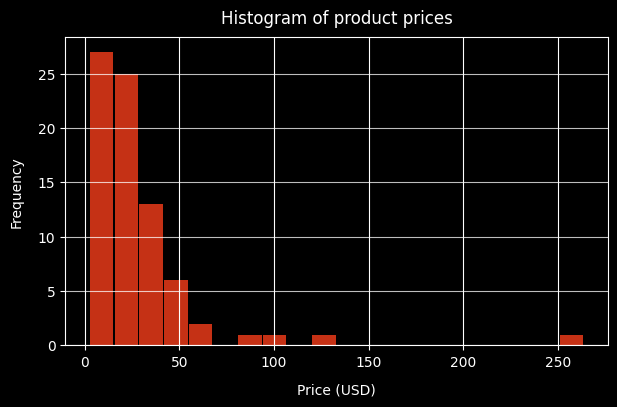

In [11]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color='#C53115',
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of product prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [12]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-09-17 14:23:31
Python Version: 3.12.1
-----------------------------------
